In [1]:
import pandas as pd
from descargar_imagenes_clases import euvi_downloader
from descargar_imagenes_clases import aia_downloader
from descargar_imagenes_clases import cor2_downloader
import sunpy.map
import sunpy.data.sample 
from descargar_imagenes_clases import initial_final_time
import astropy.units as u
from astropy.io import fits
from sunpy.net import Fido, attrs as a
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt
import pdb
import numpy as np
import requests
import warnings
warnings.filterwarnings("ignore")
# Specify the file path
file_path = "/data_local/Descargas/DatesandTimesCMEs-SRcharacteristics.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Display the data
#print(data)


In [2]:
data.keys()

Index(['ID', 'Date', 'NOAA_AR', 'Comments_1', 'Links', 'Solar_region',
       'Comments_2', 'FIL_activation_time', 'Flare_presence', 'fil_lon1',
       'fil_lat1', 'fil_lon2', 'fil_lat2', 'fil_length', 'fil_length.Mm',
       'gcs_lat', 'gcs_lon', 'gcs_radial_vel_at6', 'gcs_mean_acc1to6',
       'gcs_awd', 'gcs_awd_err', 'gcs_awl', 'gcs_awl_err', 'gcs_awl_awd_ratio',
       'aspect_ratio', 'gcs_axial_vel', 'gcs_lat_vel', 'ar_source',
       'ar_unsigned_flux', 'ar_mean_current_helicity',
       'ar_total_unsigned_current_helicity', 'ar_abs_net_current_helicity',
       'ar_excess_mag_energy_density', 'ar_free_energy_density',
       'ar_time_tilt', 'ar_tilt', 'pil_length', 'EUV loops comments',
       'Instrument', 'ROI box [arcsec]', 'EUV loops data start time',
       'EUV loops data end time'],
      dtype='object')

In [2]:
#asd=data.iloc[0:13]['EUV loops data start time']
data_short = data.iloc[0:18].copy()
data_short['EUV loops data start time'] #= pd.to_datetime(data_short['EUV loops data start time'])

0      2010/12/12 1:00:00
1     2010/12/14 14:50:00
2        2011/03/17 10:00
3      2011/06/05 3:00:00
4     2013/01/23 12:00:00
5      2013/01/29 0:00:00
6      2013/02/09 5:00:00
7      2013/04/24 4:00:00
8      2013/05/02 4:00:00
9     2013/05/17 18:00:00
10    2013/05/27 16:00:00
11    2013/06/07 22:00:00
12     No sirve, stealth 
13     2011/04/27 5:00:00
14     2011/05/23 0:00:00
15     2013/01/16 5:00:00
16    2013/01/23 18:00:00
17     2013/01/27 5:00:00
Name: EUV loops data start time, dtype: object

In [3]:
data2=data_short[['Instrument','EUV loops data start time','EUV loops data end time']].copy()
data2

,Instrument,EUV loops data start time,EUV loops data end time
0,AIA,2010/12/12 1:00:00,2010/12/12 15:00:00
1,EUVI-A,2010/12/14 14:50:00,2010/12/14 23:59:00
2,EUVI-B,2011/03/17 10:00,2011/03/17 22:00
3,AIA,2011/06/05 3:00:00,2011/06/05 16:00:00
4,AIA,2013/01/23 12:00:00,2013/01/23 20:00:00
5,AIA,2013/01/29 0:00:00,2013/01/29 8:00:00
6,AIA,2013/02/09 5:00:00,2013/02/09 12:00:00
7,EUVI-B,2013/04/24 4:00:00,2013/04/24 18:00:00
8,AIA,2013/05/02 4:00:00,2013/05/02 12:00:00
9,EUVI-B,2013/05/17 18:00:00,2013/05/18 10:00:00


In [3]:
#EUVI
#index = 1
#index = 11
index = 15
index  = 17
nave='STEREO_A'
ini=data2.iloc[index]['EUV loops data start time'].replace('/', '-')
fin=data2.iloc[index]['EUV loops data end time'].replace('/', '-')
t_ini=ini
t_fin=fin
ini,fin = initial_final_time(t_ini, t_fin, delta_t=1)
euvi_images = euvi_downloader(start_time=ini,end_time=fin,nave=nave,cadence=10,wave=195,origin_download_path=True,band_folder=True)
euvi_images.search()
euvi_images.display()

NameError: name 'data2' is not defined

In [ ]:
euvi_images.download()

In [ ]:
euvi_images.search_euvi['fileid']

Filtrando por tamanio


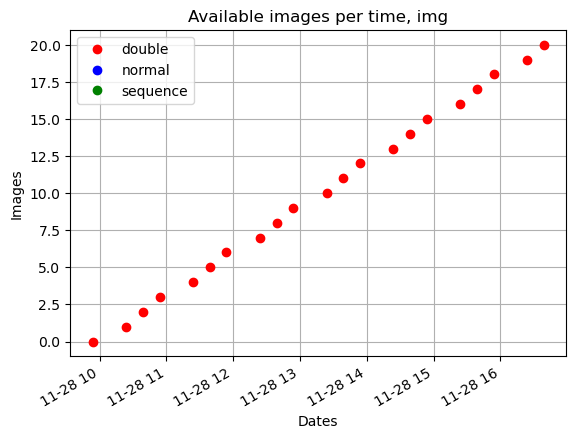

In [4]:
t_ini="2011/11/28 10:00:00"
t_ini=t_ini.replace('/', '-')
t_fin="2011/11/28 16:30:00"
t_fin=t_fin.replace('/', '-')
ini,fin = initial_final_time(t_ini, t_fin, delta_t=10)
nave='STEREO_A'
cor2_images = cor2_downloader(start_time=ini,end_time=fin,nave=nave,image_type='img')#,cadence=15,origin_download_path=True,band_folder=True)
cor2_images.search()
cor2_images.filtro()
cor2_images.display()

In [5]:
cor2_images.download()

El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_095400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_102400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_103900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_105400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_112400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f7d85972170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f7d85972170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


20111128_113900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_115400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_122400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_123900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_125400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_132400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_133900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_135400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f7d85972170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
ValueError: signal only works in main thread of the main interpreter
Exception ignored in: <function BaseEventLoop.__del__ at 0x7f7d85972170>
Traceback (most recent call last):
  File "/home/diegol/anaconda3/envs/new_actual/lib/python3.10/asyncio/base_events.py", line 687, in __del__
    self.close()


20111128_142400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_143900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_145400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_152400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_153900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_155400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_162400_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
El directorio /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/ ya existe


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

20111128_163900_d4c2a.fts:   0%|          | 0.00/8.42M [00:00<?, ?B/s]

[]
Archivos descargados en: /media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/


chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_065400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_195400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_185400_d4c2a.fts': Permiso denegado
chmod: cambiando los permisos de '/media/gehme/gehme/data/stereo/secchi/L0/a/img/cor2/20111128/20111128_055400_d4c2a.fts': Permiso denegado
